# Case Ifood 2020

1. Explore the data – be creative and pay attention to the details. You need to provide the
marketing team a better understanding of the characteristic features of respondents;


2. Create and describe a customer segmentation based on customers behaviors;


3. Create and describe a predictive model (classification) which allows the company to maximize
the profit of the next marketing campaign.


### Bibliotecas

In [1]:
#Básicas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estatística
import numpy as np
import scipy.stats as st
from scipy import stats
import statsmodels.formula.api as smf

#Bibliotecas de preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

# Clusterização
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans

#Outliers
from sklearn.ensemble import IsolationForest

#Classificadores

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

# PCA - DataCompression
from sklearn.decomposition import PCA

# importando as bibliotecas 
from sklearn.model_selection import KFold
from feature_engine import categorical_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


## Importando o dataset

In [2]:
df = pd.read_csv("data.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
#2.240 clientes
df.shape

(2240, 29)

In [4]:
#verificando o balanceamento
df.Response.value_counts()

0    1906
1     334
Name: Response, dtype: int64

## EDA

In [5]:
def normal(df, col, threshold=0.05):
    try:
        zscore, p_value = stats.normaltest(df[col])
        if p_value < threshold:
            result = 'not_normal'
        else:
            result = 'normal'
    except:
        zscore = p_value = np.nan
        result = 'not_applicable'
    return result

def outliers_count_IQR(df, col):
    try:
        if len(df[col].unique())>2: # if para eliminar features binárias
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr_range = q3 - q1
            lower = q1 - 1.5*iqr_range
            upper = q3 + 1.5*iqr_range
            out_low = df[df[col] < lower].count()[0]
            out_up = df[df[col] > upper].count()[0]
            outliers = out_low + out_up
            outliers_perc = round(outliers / df.shape[0],2)
        else:
            outliers = np.nan
            outliers_perc = np.nan
    except:
        outliers = np.nan
        outliers_perc = np.nan
    return outliers, outliers_perc


#o que interessa
def EDA_LucioEdu(df):
    df= df.rename(columns=str.lower)

    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()
    
    colunas = df.columns.tolist()
      
    eda_df['Amount_Unique'] = pd.Series(map(lambda x: len(df[x].unique().tolist()), colunas), index=colunas)

    eda_df['Min'] = df.min()
    eda_df['Max'] = df.max()
    eda_df['Mean'] = df.mean().round(3)
    eda_df['STD'] = df.std().round(3)
    
    eda_df['Normality'] = pd.Series(map(lambda x: normal(df, x), colunas), index=colunas)
    eda_df['Amount_Outliers'] = pd.Series(map(lambda x: outliers_count_IQR(df, x)[0], colunas), index=colunas)
    eda_df['%_Outliers'] = pd.Series(map(lambda x: outliers_count_IQR(df, x)[1], colunas), index=colunas)
    df = pd.DataFrame(eda_df)
    return df.loc[colunas,:]

In [6]:
#Para printar valores unicos - Dados com até 25 valores unicos
def unique_values(df):

    for cols in df.columns:
        if len(df[cols].unique()) < 25:                
            print(cols, ' = ', list(df[cols].unique()))
    return  None

In [7]:
eda = EDA_LucioEdu(df)
eda

C:\Users\Helena.Lacaz\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Helena.Lacaz\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Helena.Lacaz\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\Helena.Lacaz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1548: RuntimeWarning: invalid value encountered in sign
  term2 = np.sign(denom) * np.where(denom == 0.0, np.nan,


,Amount_NaN,%_NaN,DType,Amount_Data,Amount_Unique,Min,Max,Mean,STD,Normality,Amount_Outliers,%_Outliers
id,0,0.00,int64,2240,2240,0,11191,5592.160,3246.662,not_normal,0.0,0.00
year_birth,0,0.00,int64,2240,59,1893,1996,1968.806,11.984,not_normal,3.0,0.00
education,0,0.00,object,2240,5,2n Cycle,PhD,NaN,NaN,not_applicable,NaN,NaN
marital_status,0,0.00,object,2240,8,Absurd,YOLO,NaN,NaN,not_applicable,NaN,NaN
income,24,0.01,float64,2216,1975,1730,666666,52247.251,25173.077,normal,8.0,0.00
kidhome,0,0.00,int64,2240,3,0,2,0.444,0.538,not_normal,0.0,0.00
teenhome,0,0.00,int64,2240,3,0,2,0.506,0.545,not_normal,0.0,0.00
dt_customer,0,0.00,object,2240,663,2012-07-30,2014-06-29,NaN,NaN,not_applicable,NaN,NaN
recency,0,0.00,int64,2240,100,0,99,49.109,28.962,not_normal,0.0,0.00
mntwines,0,0.00,int64,2240,776,0,1493,303.936,336.597,not_normal,35.0,0.02


In [8]:
unique_values(df)

Education  =  ['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']
Marital_Status  =  ['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']
Kidhome  =  [0, 1, 2]
Teenhome  =  [0, 1, 2]
NumDealsPurchases  =  [3, 2, 1, 5, 4, 15, 7, 0, 6, 9, 12, 8, 10, 13, 11]
NumWebPurchases  =  [8, 1, 2, 5, 6, 7, 4, 3, 11, 0, 27, 10, 9, 23, 25]
NumCatalogPurchases  =  [10, 1, 2, 0, 3, 4, 6, 28, 9, 5, 8, 7, 11, 22]
NumStorePurchases  =  [4, 2, 10, 6, 7, 0, 3, 8, 5, 12, 9, 13, 11, 1]
NumWebVisitsMonth  =  [7, 5, 4, 6, 8, 9, 20, 2, 3, 1, 10, 0, 14, 19, 17, 13]
AcceptedCmp3  =  [0, 1]
AcceptedCmp4  =  [0, 1]
AcceptedCmp5  =  [0, 1]
AcceptedCmp1  =  [0, 1]
AcceptedCmp2  =  [0, 1]
Complain  =  [0, 1]
Z_CostContact  =  [3]
Z_Revenue  =  [11]
Response  =  [1, 0]


## Algumas observações pelo EDA

In [9]:
#year_birth --> temos data de 1800 e pouco
#Marital_Status --> O que é Absurd e YOLO?
#Recency --> number of days since the last purchase
#dt_customer --> talvez quebrar a data e ficar com o ano apenas
#remover de cara id (porque corresponde a cada cliente) e Z_Revenue e Z_CostContact (porque tem apenas 1 valor unico)
#income tem valores faltantes e valores unicos muito alto, mas resolvi fazer a media para preencher os dados

In [10]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [11]:
## Vou dropar as linhas NaN de INcome tb, pois representam apenas 1%
## vou renomear "Alone"  e "YOLO" para "Single"
## Vou dropar o Absurd 

In [12]:
##fillNA
#df['Income'] = df.Income.fillna(df.Income.mean())
df = df.dropna()

In [13]:
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'YOLO'], 'Single')

In [14]:
#df_remove = df.loc[(df['Marital_Status'] == 'YOLO') | (df['Marital_Status'] == 'Absurd')]
df_remove = df.loc[(df['Marital_Status'] == 'Absurd')]

df = df.drop(df_remove.index)

In [15]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      476
Divorced    232
Widow        76
Name: Marital_Status, dtype: int64

In [16]:
eda = EDA_LucioEdu(df)
eda.loc[eda['DType']=='object']

,Amount_NaN,%_NaN,DType,Amount_Data,Amount_Unique,Min,Max,Mean,STD,Normality,Amount_Outliers,%_Outliers
education,0,0.0,object,2214,5,2n Cycle,PhD,NaN,NaN,not_applicable,NaN,NaN
marital_status,0,0.0,object,2214,5,Divorced,Widow,NaN,NaN,not_applicable,NaN,NaN
dt_customer,0,0.0,object,2214,662,2012-07-30,2014-06-29,NaN,NaN,not_applicable,NaN,NaN


### Resolvendo o problema das datas

In [17]:
#vou considerar apenas os anos que cada cliente entrou no app

In [18]:
def break_date(df, column):
    df['year']   = pd.to_datetime(df[column], format = MY_FORMAT).dt.year
    df['month']  = pd.to_datetime(df[column], format = MY_FORMAT).dt.month
    df['day']    = pd.to_datetime(df[column], format = MY_FORMAT).dt.day
    return df.drop(columns = [column])

MY_FORMAT = '%Y-%m-%d'

In [19]:
df = break_date(df, 'Dt_Customer')
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'year', 'month',
       'day'],
      dtype='object')

In [20]:
df.year.unique()

array([2012, 2014, 2013], dtype=int64)

In [21]:
#aparentemente as datas de entrada no app estão ok

In [22]:
df.Year_Birth.unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1976,
       1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1989,
       1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955,
       1966, 1988, 1948, 1958, 1972, 1960, 1983, 1945, 1991, 1962, 1953,
       1956, 1992, 1961, 1900, 1986, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940], dtype=int64)

In [23]:
#temos datas menores que 1900, vou excluir se a % for pequena
df['Year_Birth'].value_counts()

1976    89
1971    86
1975    83
1972    78
1978    76
1970    75
1965    74
1973    72
1969    70
1974    69
1956    55
1979    53
1952    52
1958    52
1977    52
1968    51
1966    50
1959    50
1960    49
1954    49
1955    48
1967    44
1963    44
1962    44
1982    44
1951    42
1986    41
1983    41
1964    41
1957    40
1980    39
1981    38
1984    38
1953    35
1961    35
1985    32
1949    30
1988    29
1989    29
1950    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1944     7
1943     6
1995     5
1993     4
1994     3
1996     2
1940     1
1893     1
1899     1
1941     1
1900     1
Name: Year_Birth, dtype: int64

In [24]:
#df['Year_Birth'] = df["Year_Birth"].replace([1893], 1993)
#df['Year_Birth'] =  df["Year_Birth"].replace([1899], 1999)
#df.Year_Birth.unique()

df_remove2 = df.loc[(df['Year_Birth'] < 1900)]

df = df.drop(df_remove2.index)

### Agora vou dropar tudo que não quero

In [25]:
df = df.drop(columns = ['ID', 'Z_Revenue','Z_CostContact','month','day'])
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,year
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,4,7,0,0,0,0,0,0,1,2012
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,0,2014
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,0,2013
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,4,6,0,0,0,0,0,0,0,2014
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,6,5,0,0,0,0,0,0,0,2014


## Correlação das Features

-0.2006922965769508
0.3224313180924918


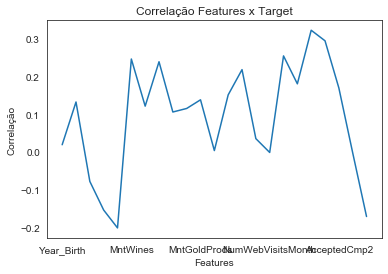

In [26]:
## Ver o quanto as features se correlacionam com a coluna "Response"

corr_target = df.corr()['Response']

del corr_target['Response']

sns.set_style('white')
corr_target.plot()
plt.xlabel('Features')
plt.ylabel('Correlação')
plt.title('Correlação Features x Target')

print(min(corr_target))
print(max(corr_target))

In [27]:
#podemos observar que nenhuma feature se correlaciona muito fortemente a variavel target

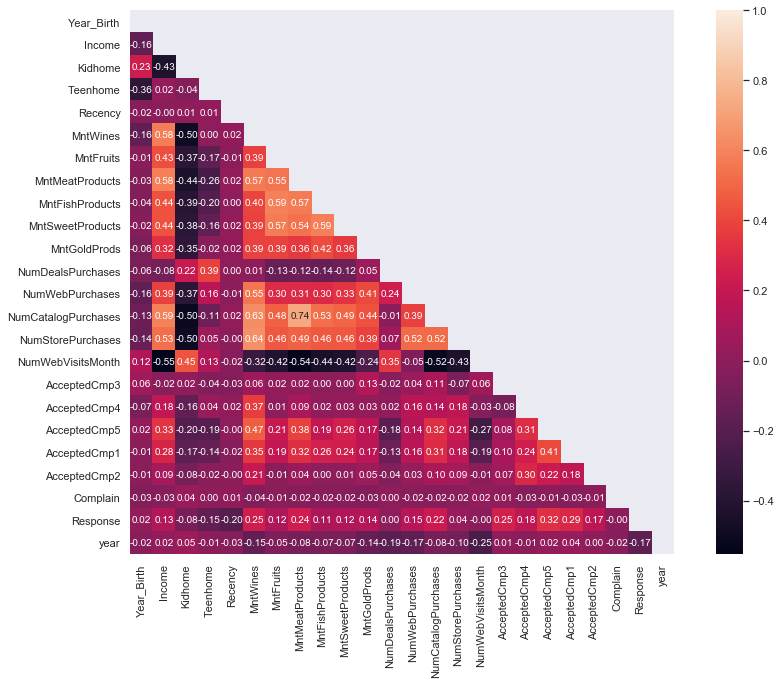

In [28]:
## fazer um HeatMap de todas as Features

# Plotando um mapa de calor das correlações com todas as variáveis
corrmat = df.corr()
sns.set(font_scale=1.0)
f, ax = plt.subplots(figsize=(15, 10))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=bool))
hm = sns.heatmap(corrmat, 
                 mask=mask,
                 cbar=True, # formatando a barra lateral de cores para o heatmap
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=corrmat.columns, 
                 xticklabels=corrmat.columns)

In [29]:
corrmat_lower = (corrmat*~mask).replace({0.0:np.nan}).round(2)

corrmat.stack(dropna=True)

# O mapa de calor ajuda nos primeiros insights. Mas e se eu quiser uma lista com as relações mais relevantes?
corr_list = abs(corrmat_lower).stack(dropna=True)\
                              .reset_index()\
                              .rename({'level_0':'var_1','level_1':'var_2',0:'corr'}, axis=1)\
                              .sort_values(by='corr', ascending=False)\
                              .head(20)
corr_list

,var_1,var_2,corr
85,NumCatalogPurchases,MntMeatProducts,0.74
96,NumStorePurchases,MntWines,0.64
83,NumCatalogPurchases,MntWines,0.63
34,MntFishProducts,MntFruits,0.59
79,NumCatalogPurchases,Income,0.59
44,MntSweetProducts,MntFishProducts,0.59
22,MntMeatProducts,Income,0.58
11,MntWines,Income,0.58
42,MntSweetProducts,MntFruits,0.57
35,MntFishProducts,MntMeatProducts,0.57


In [30]:
#podemos observar que nenhuma festure com correlação muito forte uma com a outra, apesar disso:
#Podemos observar que talvez quem melhor tenha correspondido bem as campanhas (todas), são as pessoas que compram vinhos e carnes especiais
# a maior correlação encontrada é de compras de carne com compras por catalogo
#correspondencia negativa pra quem compra carne e faz visitas em websites

### Teste-t da maior correlação em relação ao Response

In [31]:
media_amostral = df.AcceptedCmp5.mean()
dev_pad_amostral = df.AcceptedCmp5.std()
n_amostral = len(df.AcceptedCmp5)
raiz_n_amostral = n_amostral**0.5 
graus_liberdade = n_amostral - 1
raiz_n = len(df.AcceptedCmp5)**0.5 

In [32]:
def t (alpha):
    y2 = st.t.ppf((1 - alpha/2), graus_liberdade) # st.t.ppf((alpha/2, graus_liberdade)) #coddigo tem 2 argumentos pra funcionar
    return y2

In [33]:
def limites_amostrais(media_amostral, dev_pad_amostral, t, raiz_n):
    limite_inferior_amostral = media_amostral - t*dev_pad_amostral/raiz_n
    limite_superior_amostral = media_amostral + t*dev_pad_amostral/raiz_n
    return print("Intervalo de confiança:", limite_inferior_amostral, 'até', limite_superior_amostral)

In [34]:
alpha_95 = 0.05
t_95 = round(t(alpha_95),2)
print('Valor de t-estatístico:', t_95)
print(limites_amostrais(media_amostral, dev_pad_amostral, t_95, raiz_n))

Valor de t-estatístico: 1.96
Intervalo de confiança: 0.06153517998428846 até 0.08313028113686888
None


In [35]:
# não podemos exluir a Hipotese 0, que significa que que ele se correlaciona diretamente com o target.

# Customer Analysis 

## Vou fazer uma análise das Features em relação a target Response

### 1º Vou fazer uma clusterização do dataset tirando o target e analisar os grupos criados

In [36]:
### Separar as colunas para o get_dummies
### vou colocar em um df diferente
dummies = ['Education', 'Marital_Status','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain']

df_2 = pd.get_dummies(df, columns = dummies)
#df_2.drop(dummies, inplace=True, axis=1)
#df_2.drop(columns = ['education'], inplace=True, axis=0)
#df_2.head()

In [37]:
X = df_2.drop(columns = "Response")
y = df_2.Response

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

1 86267.9999999999
2 74423.06392514594
3 68891.2997743665
4 65826.76769037294
5 61662.59951088609
6 60296.84218610843
7 58261.45562760072
8 55616.17835663707
9 53231.81809465395
10 50862.168505830945


Text(0, 0.5, 'WSS')

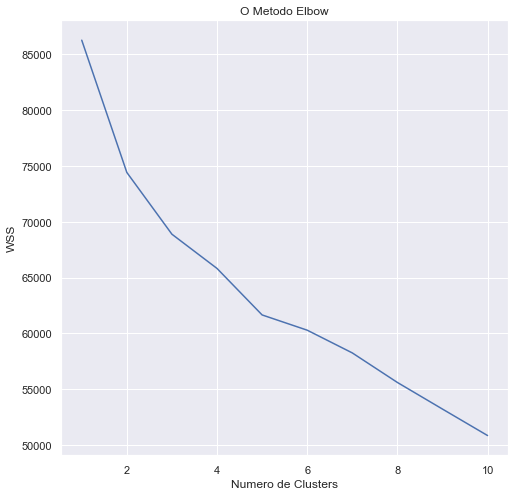

In [39]:
## Vou utilizar o K-Means a principio
#primeiro vou identificar o nr correto de cluesters

plt.figure(figsize=(8,8))

# plotando o gráfico do método elbow
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X_scaled)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares

In [40]:
# 2 ou 4 clusters.. confirmar abaixo

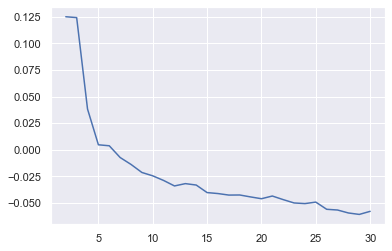

In [41]:
sillhoute_scores = []
n_cluster_list = np.arange(2,31).astype(int)

for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(df_2)
    sillhoute_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    
plt.plot(n_cluster_list,sillhoute_scores)

In [42]:
# vpu ficar com 4 clusters

In [43]:
# utilizando o K-Means com 4 clusters
kmeans = KMeans(n_clusters = 4, n_init=25, max_iter = 600, random_state=0).fit(X_scaled)
labels = kmeans.predict(X_scaled)
C = kmeans.cluster_centers_

In [44]:
print("Labels:" + str(labels))
print("________")
print("Centroides:" + str(C))

Labels:[2 0 2 ... 2 2 0]
________
Centroides:[[ 1.63575650e-01 -6.14392373e-01  5.73736208e-01  1.04590592e-02
  -1.23420685e-02 -6.97712770e-01 -5.24872868e-01 -6.10484443e-01
  -5.34095928e-01 -5.23588676e-01 -4.75403313e-01  4.30474351e-02
  -5.40911202e-01 -6.73339065e-01 -6.98866562e-01  4.83460024e-01
   9.41687565e-02  2.10000591e-02  1.36097465e-01 -3.47024201e-02
   5.07557184e-02 -6.90939593e-02 -1.22991789e-02  2.26318075e-02
   7.09697854e-03 -1.51465236e-03 -5.21995869e-02  2.46896743e-01
  -2.46896743e-01  1.02438646e-01 -1.02438646e-01  1.31029540e-02
  -1.31029540e-02  2.14298196e-01 -2.14298196e-01  2.79235939e-01
  -2.79235939e-01  9.79013000e-02 -9.79013000e-02]
 [-4.07385661e-02  1.06892564e+00 -7.37845951e-01 -5.57486865e-01
   4.32399436e-03  1.51094297e+00  6.53577149e-01  1.23012522e+00
   8.02409090e-01  8.30463726e-01  6.24307359e-01 -5.32890645e-01
   5.52941406e-01  1.10160785e+00  7.52248109e-01 -8.22230465e-01
   6.99455003e-02  1.00065397e-02 -1.58187135e

In [45]:
df['labels'] = labels

In [46]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,year,labels
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,1,2012,2
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,0,2014,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,0,2013,2
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,0,2014,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,0,2014,0


In [47]:
df['labels'].value_counts()

0    1167
2     787
1     237
3      21
Name: labels, dtype: int64

In [48]:
df_g0 = df.loc[df.labels == 0]
df_g1 = df.loc[df.labels == 1]
df_g2 = df.loc[df.labels == 2]
df_g3 = df.loc[df.labels == 3]
#df_g4 = df.loc[df.labels == 4]

In [49]:
df_g0['Response'].mean()

0.0959725792630677

In [50]:
df_g1['Response'].mean()

0.4978902953586498

In [51]:
df_g2['Response'].mean() 

0.12579415501905972

In [52]:
df_g3['Response'].mean()

0.14285714285714285

In [53]:
df_g0.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,1167.0,1970.807198,11.040842,1940.0,1963.0,1972.0,1978.0,1996.0
Income,1167.0,36745.447301,14552.190921,1730.0,27160.0,36443.0,45712.0,162397.0
Kidhome,1167.0,0.750643,0.510975,0.0,0.0,1.0,1.0,2.0
Teenhome,1167.0,0.511568,0.538081,0.0,0.0,0.0,1.0,2.0
Recency,1167.0,48.669237,28.918830,0.0,24.0,49.0,74.0,99.0
MntWines,1167.0,69.610111,95.396570,0.0,9.0,28.0,88.5,691.0
MntFruits,1167.0,5.426735,8.108478,0.0,1.0,3.0,7.0,65.0
MntMeatProducts,1167.0,29.926307,33.184495,0.0,8.0,17.0,39.0,235.0
MntFishProducts,1167.0,8.343616,13.417661,0.0,2.0,4.0,11.0,150.0
MntSweetProducts,1167.0,5.513282,8.021922,0.0,0.0,3.0,7.0,78.0


In [54]:
df_g1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,237.0,1968.400844,13.265368,1941.0,1957.0,1969.0,1979.0,1994.0
Income,237.0,79119.021097,10649.058414,37929.0,73687.0,80184.0,84953.0,105471.0
Kidhome,237.0,0.046414,0.210824,0.0,0.0,0.0,0.0,1.0
Teenhome,237.0,0.202532,0.442826,0.0,0.0,0.0,0.0,2.0
Recency,237.0,49.151899,29.377621,1.0,25.0,49.0,74.0,99.0
MntWines,237.0,814.679325,335.594790,152.0,557.0,822.0,1060.0,1493.0
MntFruits,237.0,52.206751,49.999783,0.0,19.0,31.0,76.0,190.0
MntMeatProducts,237.0,442.476793,259.801384,21.0,230.0,430.0,625.0,974.0
MntFishProducts,237.0,81.227848,68.025036,0.0,29.0,63.0,120.0,253.0
MntSweetProducts,237.0,61.135021,53.102622,0.0,20.0,40.0,96.0,194.0


In [55]:
#poderia fazer um teste estatístico nesses grupos para verificar o quanto eles realmente se correlacionam
#com as features e como elas ajudam a diferenciar as classes
#porém podemos ver que na média temos apenas um grupo com valor próximo de 0 (ou seja, mais característico dessa classe)
#e nenhum grupo com média perto de 1 (que caracterizaria um grupo com carcteristicas mais fortes dessa classe)

In [56]:
#conclusão é que a clusterização feita dessa maneira não serve para separar as duas classes

## 2º Vou fazer PCA e KMeans

In [57]:
X = df_2.drop(columns = ['Response'])
y = df_2.Response

from sklearn.model_selection import train_test_split

#fazer o split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
# pré-processamento de dados: colocando na mesma escala

# instanciando a variável
sc = StandardScaler()
#scaler = preprocessing.RobustScaler().fit(X_train)

# ajustando com os dados de treino
X_train = sc.fit_transform(X_train)
#X_train = scaler.transform(X_train)

# transformando os dados de teste
X_test = sc.transform(X_test)
#X_test = scaler.transform(X_test)

In [59]:
%%time

# instanciando o modelo
pca = PCA(n_components = 3)
# ajustando com os dados de treino
X_train_pca = pca.fit_transform(X_train)
# transformando os dados de teste
X_test_pca = pca.transform(X_test)

Wall time: 40.9 ms


In [60]:
df_pca = pd.DataFrame(X_train_pca,columns=['pca_1','pca_2','pca_3'])
df_pca['Response'] = df_2['Response']
df_pca.head()

,pca_1,pca_2,pca_3,Response
0,-0.090387,-0.741792,-0.027838,1.0
1,1.165362,-1.043109,-1.539178,0.0
2,3.739183,-2.790972,-0.995752,0.0
3,2.379222,-1.423226,0.087914,0.0
4,-2.231773,0.152248,1.024577,0.0


In [61]:
df_pca['Response'].value_counts()

0.0    1492
1.0     258
Name: Response, dtype: int64

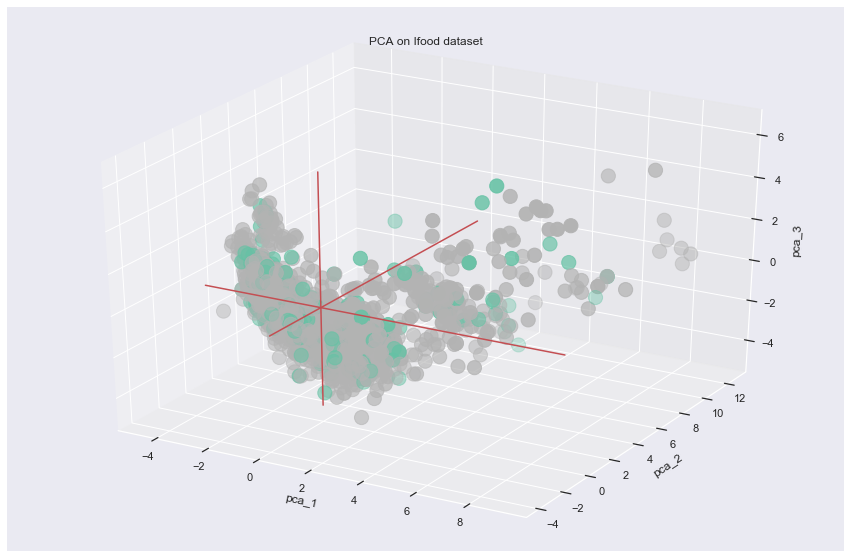

In [62]:
# Plot 
from mpl_toolkits.mplot3d import Axes3D

my_color=df_pca['Response']
labels = [df_pca['pca_1'], df_pca['pca_2'], df_pca['pca_3']]

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['pca_1'], df_pca['pca_2'], df_pca['pca_3'], c=my_color, cmap="Set2_r", s=200, label=labels)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(df_pca['pca_1']), max(df_pca['pca_1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(df_pca['pca_2']), max(df_pca['pca_2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(df_pca['pca_3']), max(df_pca['pca_3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("pca_1")
ax.set_ylabel("pca_2")
ax.set_zlabel("pca_3")
ax.set_title("PCA on Ifood dataset")
plt.show()

In [63]:
# utilizando o K-Means com 3 clusters
kmeans = KMeans(n_clusters = 4, n_init=25, max_iter = 600, random_state=0).fit(X_train)
labels = kmeans.predict(X_train)
C = kmeans.cluster_centers_

In [64]:
df_pca['labels'] = labels

In [65]:
df_g0 = df_pca.loc[df_pca.labels == 0]
df_g1 = df_pca.loc[df_pca.labels == 1]
df_g2 = df_pca.loc[df_pca.labels == 2]
df_g2 = df_pca.loc[df_pca.labels == 3]

In [66]:
df_g0['Response'].mean()

0.15074309978768577

In [67]:
df_g1['Response'].mean()

0.14130434782608695

In [68]:
df_g2['Response'].mean()

0.1400329489291598

In [69]:
df_g3['Response'].mean()

0.14285714285714285

In [70]:
#mesma conclusão do item anterior

## 3º Dessa vez vou separar os dois grupos Response = 0 e Response = 1 do dataframe original e analisar a diferença entre os grupos que aceitaram e não aceitaram a promoção

In [71]:
df_positive = df.loc[(df.Response == 1)] 
EDA_LucioEdu(df_positive)

,Amount_NaN,%_NaN,DType,Amount_Data,Amount_Unique,Min,Max,Mean,STD,Normality,Amount_Outliers,%_Outliers
year_birth,0,0.0,int64,332,54,1943,1996,1969.425,12.282,not_normal,0.0,0.00
education,0,0.0,object,332,5,2n Cycle,PhD,NaN,NaN,not_applicable,NaN,NaN
marital_status,0,0.0,object,332,5,Divorced,Widow,NaN,NaN,not_applicable,NaN,NaN
income,0,0.0,float64,332,306,7500,105471,60152.343,23205.447,not_normal,0.0,0.00
kidhome,0,0.0,int64,332,3,0,2,0.343,0.488,not_normal,0.0,0.00
teenhome,0,0.0,int64,332,3,0,2,0.307,0.494,not_normal,0.0,0.00
recency,0,0.0,int64,332,92,0,99,35.196,27.629,not_normal,0.0,0.00
mntwines,0,0.0,int64,332,242,1,1492,502.711,428.466,not_normal,0.0,0.00
mntfruits,0,0.0,int64,332,103,0,193,37.747,45.850,not_normal,25.0,0.08
mntmeatproducts,0,0.0,int64,332,227,1,981,294.274,287.404,not_normal,0.0,0.00


In [72]:
# utilizando o K-Means com 4 clusters
df_positive.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,332.0,1969.424699,12.282318,1943.0,1959.00,1971.0,1979.00,1996.0
Income,332.0,60152.343373,23205.447430,7500.0,39743.25,64044.0,80632.50,105471.0
Kidhome,332.0,0.343373,0.488092,0.0,0.00,0.0,1.00,2.0
Teenhome,332.0,0.307229,0.493654,0.0,0.00,0.0,1.00,2.0
Recency,332.0,35.195783,27.628758,0.0,11.00,29.5,56.00,99.0
MntWines,332.0,502.710843,428.465858,1.0,94.75,442.5,884.00,1492.0
MntFruits,332.0,37.746988,45.849904,0.0,4.00,21.0,53.00,193.0
MntMeatProducts,332.0,294.274096,287.403745,1.0,47.00,174.5,512.50,981.0
MntFishProducts,332.0,51.231928,61.101895,0.0,4.00,25.0,80.50,250.0
MntSweetProducts,332.0,38.304217,46.201329,0.0,3.00,20.0,56.25,198.0


In [73]:
df_negative = df.loc[(df.Response == 0)] 
EDA_LucioEdu(df_negative)

,Amount_NaN,%_NaN,DType,Amount_Data,Amount_Unique,Min,Max,Mean,STD,Normality,Amount_Outliers,%_Outliers
year_birth,0,0.0,int64,1880,57,1900,1996,1968.785,11.690,not_normal,1.0,0.00
education,0,0.0,object,1880,5,2n Cycle,PhD,NaN,NaN,not_applicable,NaN,NaN
marital_status,0,0.0,object,1880,5,Divorced,Widow,NaN,NaN,not_applicable,NaN,NaN
income,0,0.0,float64,1880,1691,1730,666666,50808.982,25258.502,not_normal,8.0,0.00
kidhome,0,0.0,int64,1880,3,0,2,0.460,0.543,not_normal,0.0,0.00
teenhome,0,0.0,int64,1880,3,0,2,0.541,0.545,not_normal,0.0,0.00
recency,0,0.0,int64,1880,100,0,99,51.469,28.515,not_normal,0.0,0.00
mntwines,0,0.0,int64,1880,684,0,1493,270.058,305.775,not_normal,40.0,0.02
mntfruits,0,0.0,int64,1880,153,0,199,24.234,38.175,not_normal,226.0,0.12
mntmeatproducts,0,0.0,int64,1880,471,0,1725,144.240,203.002,not_normal,154.0,0.08


In [74]:
df_negative.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,1880.0,1968.784574,11.690249,1900.0,1959.00,1970.0,1977.00,1996.0
Income,1880.0,50808.981915,25258.502001,1730.0,34418.75,50138.5,66305.50,666666.0
Kidhome,1880.0,0.460106,0.543483,0.0,0.00,0.0,1.00,2.0
Teenhome,1880.0,0.540957,0.545359,0.0,0.00,1.0,1.00,2.0
Recency,1880.0,51.469149,28.515369,0.0,27.00,52.0,77.00,99.0
MntWines,1880.0,270.057979,305.775148,0.0,21.75,152.5,445.00,1493.0
MntFruits,1880.0,24.234043,38.174768,0.0,1.00,7.0,28.00,199.0
MntMeatProducts,1880.0,144.240426,203.002328,0.0,14.00,56.0,193.25,1725.0
MntFishProducts,1880.0,35.039362,52.951759,0.0,2.00,11.0,43.00,259.0
MntSweetProducts,1880.0,25.028723,39.798992,0.0,1.00,7.0,30.00,262.0


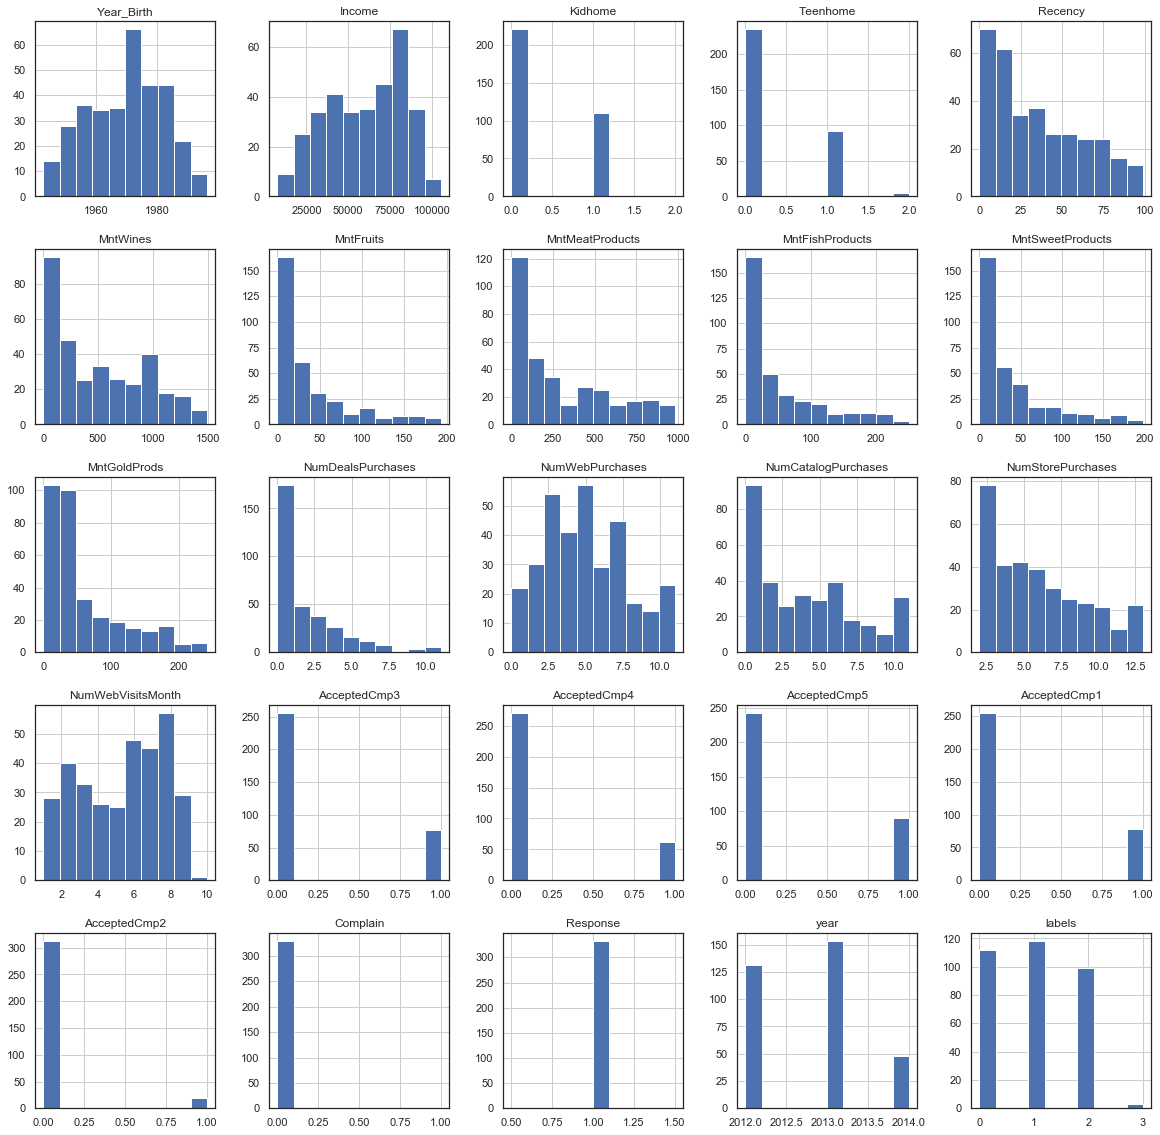

In [75]:
#plotando um histograma para visualizar a distrubuição dos dados dentro do Response = 1
sns.set_style('white')
hist = df_positive.hist(figsize = (20,20))

Text(0.5, 1.0, 'Pefil Estado Civil - Response = 1')

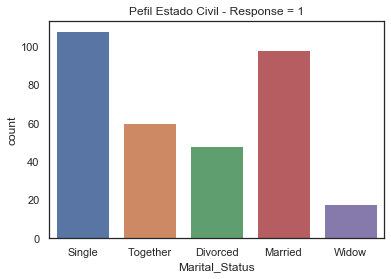

In [76]:
sns.countplot(df_positive['Marital_Status'])
plt.title('Pefil Estado Civil - Response = 1')

In [77]:
# comparando rapidamente um grupo com outro podemos notar:

# média de idade de quem aceitou a campanha é praticamente igual
# média da renda de quem responde positivamente a campanha é maior 
# média de quantidade de filhos pequenos e/ou adolescente é menor em quem aceita a campanha
# média de recency é menor em quem respondeu positivamente a campanha (teoria faz compras mais frequentes), com menor intervalor de tempo
# média de compras de produtos "finos" como carne, sweetproducts e wines é maior no grupo que respondeu positivamente a campanha
# o grupo que respondeu positivamente a campanha entrou em maior numero nas campanhas anteriores
# média de reclamação é muito menor no grupo que repsondeu positivamente a campanha
# não tem um comportamento mto claro quando ao estado civil

#em uma analise rapida e básica o perfil dos clientes podem vir a responder melhor a camapnha é:

# nascidos na decada de 70/80
# usam com frequencia o app
# pessoas com maior poder aquisitivo
# com menor numero de filhos 
# gostam de produtos finos, principalmente vinhos 
# compram mais pela web

## Criando um modelo preditivo para maximizar o lucro

In [78]:
df_2.Response.value_counts()

0    1880
1     332
Name: Response, dtype: int64

In [79]:
#rodei os mesmos algoritimos abaixo com os dados balanceados das classes, obtive resultados piores.

In [80]:
# vou fazer o frequency encoder para o ano de nascimento e para o ano que virou cliente para tentar diminuir ruido

In [81]:
df_2['year'] = df_2['year'].astype(str)
df_2['Year_Birth'] = df_2['Year_Birth'].astype(str)

In [82]:
X = df_2.drop(columns = ['Response'])
y = df_2.Response

In [83]:
from sklearn.model_selection import train_test_split

#fazer o split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
from feature_engine import categorical_encoders as ce

encoder = ce.CountFrequencyCategoricalEncoder(encoding_method='frequency',
                         variables=['Year_Birth','year'])

#treinar o endonder
encoder.fit(X_train)

#transformar os dados
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [85]:
from sklearn import preprocessing

scaler = preprocessing.RobustScaler().fit(X_train)
#scaler = preprocessing.StandardScaler().fit(X_train)

#agora vamos normalizar os df treino e teste usando o scaler

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#caso apareça alguma NaN
#X_test[np.isnan(X_test)] = np.median(X_test[~np.isnan(X_test)])

KNeighborsClassifier
****Results****

-----Dados de Treino-----
Accuracy: 0.8892029395138497
MSE - treino 0.11079706048615037
MAE - treino 0.0
R2 - treino 0.15103523927053364

-----Dados de Teste-----
Accuracy: 0.891647855530474
MSE - test 0.10835214446952596
MAE - test 0.0
R2 - test 0.06144067796610153
Matriz Confusão
 [[380   4]
 [ 44  15]]
GaussianNB
****Results****

-----Dados de Treino-----
Accuracy: 0.8191068400226117
MSE - treino 0.18089315997738836
MAE - treino 0.0
R2 - treino -0.38606491547667976

-----Dados de Teste-----
Accuracy: 0.837471783295711
MSE - test 0.16252821670428894
MAE - test 0.0
R2 - test -0.40783898305084776
Matriz Confusão
 [[339  45]
 [ 27  32]]
LogisticRegression
****Results****

-----Dados de Treino-----
Accuracy: 0.889768230638779
MSE - treino 0.11023176936122103
MAE - treino 0.0
R2 - treino 0.1553666921313983

-----Dados de Teste-----
Accuracy: 0.90744920993228
MSE - test 0.09255079006772009
MAE - test 0.0
R2 - test 0.19831391242937846
Matriz Confusão
 [

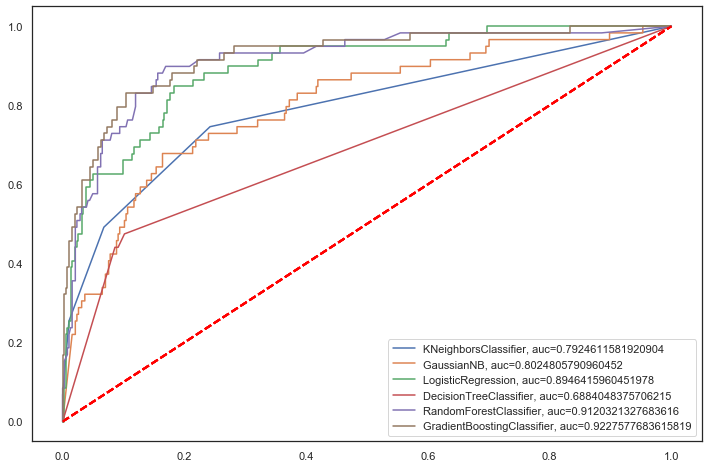

In [86]:
%%time

classifiers = [
    KNeighborsClassifier(),
    GaussianNB(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()]

plt.figure(figsize=(12,8))

for clf in classifiers:
    # instanciando o modelo
    clf.fit(X_train, y_train)
    # armazenando o nome do modelo na variável name
    name = clf.__class__.__name__
    # imprimindo o nome do modelo
    print("="*30)
    print(name)
    # imprimindo os resultados do modelo
    print('****Results****')
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    
    #print("Precision:", metrics.precision_score(y_test, y_pred_test))
    #print("Recall:", metrics.recall_score(y_test, y_pred_test))
    
    # imprimindo as métricas para os dados de treino
    print('\n-----Dados de Treino-----')
    print("Accuracy:", metrics.accuracy_score(y_train, y_pred_train))
    print('MSE - treino', mean_squared_error(y_train, y_pred_train))
    print('MAE - treino', median_absolute_error(y_train, y_pred_train))
    print('R2 - treino', r2_score(y_train, y_pred_train))
    
    # imprimindo as métricas para os dados de teste
    print('\n-----Dados de Teste-----')
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test))
    print('MSE - test', mean_squared_error(y_test, y_pred_test))
    print('MAE - test', median_absolute_error(y_test, y_pred_test))
    print('R2 - test', r2_score(y_test, y_pred_test))
    print('Matriz Confusão\n',metrics.confusion_matrix(y_test, y_pred_test))
    
    # plotando a curva ROC
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label=name+", auc="+str(auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.legend(loc=4)

In [87]:
#plotando comparativo
def Efic(classifiers,xtrain,xtest,ytrain,ytest):
    
    df_modelo = pd.DataFrame(columns=[0,1,2,3,4,5,6,7])
    
    for clf in classifiers:
        
        # fit do treino
        clf.fit(xtrain,ytrain)
        
        #Matriz de confusao do teste
        ypred = clf.predict(xtest)
        conf_mat = metrics.confusion_matrix(ytest,ypred)
        tn, fp, fn, tp = metrics.confusion_matrix(ytest, ypred).ravel()
        
        # Calculando as metricas
        # Fonte com as metricas : https://en.wikipedia.org/wiki/Confusion_matrix
        acc  = metrics.accuracy_score(ytest,ypred)
        sens = metrics.recall_score(ytest,ypred)
        spec = tn/(tn+fp)
        prec = metrics.precision_score(ytest,ypred)
        FPR  = fp/(fp+tn)
        AUC  = metrics.roc_auc_score(ytest,ypred)
        F1S  = metrics.f1_score(ytest,ypred)
        
        #adicionando no DF:
        
        name = clf.__class__.__name__
        
        df_modelo = df_modelo.append([[name,acc,sens,spec,prec,FPR,AUC,F1S]])

    dic_columns = {0:'Modelo',
                   1:'Accuracy',
                   2:'Sensitivity/Recall(TPR)',
                   3:'Specificity(TNR)',
                   4:'Precision(PPV)',
                   5:'FPR',
                   6:'AUC',
                   7:'F1 Score'}
    df_modelo.rename(columns = dic_columns,inplace=True)
    
    return round(df_modelo,3)

In [88]:
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier()]

df_modelo = Efic(classifiers,X_train,X_test,y_train,y_test)

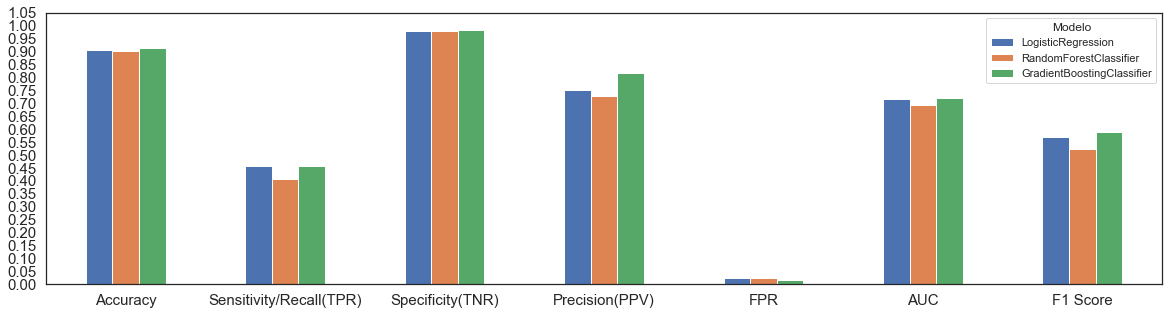

In [89]:
df_modelo.set_index('Modelo').T.plot.bar(figsize=(20,5));
plt.ylim(0,1);
plt.xticks(rotation=0,fontsize=15);
plt.yticks(np.arange(0,1.1,0.05),fontsize=15);

## Rodando os algoritimos com melhores resultados com Cross Validation

In [90]:
%%time

list_best_models = [
    #KNeighborsClassifier(),
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

#dicionários dos parâmetros de cada modelo
#hip_KNN = {
#    'n_neighbors': range(1,10,2),
#    'weights': ('uniform','distance'),
#    'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute')}
    
hip_Log = {
    'C': range(1,3,1),
    'class_weight': (None,'balanced'),
    #'max_iter' : range(1,300, 99),
    'multi_class' : ('auto', 'ovr', 'multinomial')}
    
hip_RF = {
    'n_estimators' : range(1,200,50),
    'criterion' : ('gini','entropy'),
    'max_depth' : range(5,10,5)}
    
hip_G = {
    'loss' : ('deviance','exponential'),
    'n_estimators' : range(1,300,100)}

lista_hiperp = [
    #hip_KNN,
    hip_Log,
    hip_RF,
    hip_G
]

lista_metricas_treino = []
lista_metricas_teste = []
lista_mehores_parametros = []

# criando uma funçào para rodas o pipeline 
for indice in range(0,len(list_best_models)):
    
    modelo = list_best_models[indice]
    hiperp = lista_hiperp[indice]
                    
    clf = GridSearchCV(modelo, hiperp, cv=3)
    # ajustando o modelo
    clf.fit(X_train, y_train)
    # armazenando o nome do modelo
    name = list_best_models[indice]
    # imprimindo o nome do modelo
    print("="*30)
    print(name)
    # imprimindo os resultados
    print('****Results****')
    # fazendo predições
   # estimativa do treino
    y_pred_train = clf.predict(X_train)
    
    # estimativa do teste
    y_pred_test = clf.predict(X_test)
    
    # salvar a acurácia do melhor modelo para treino e teste
    lista_metricas_treino.append(metrics.accuracy_score(y_train, y_pred_train))
    lista_metricas_teste.append(metrics.accuracy_score(y_test, y_pred_test))
    lista_mehores_parametros.append(clf.best_params_)
    
    print("Teste: " + str(np.mean(lista_metricas_teste)))
    print("Treino: " + str(np.mean(lista_metricas_treino)))
    print('Matriz Confusão Teste\n',metrics.confusion_matrix(y_test, y_pred_test))
    print("Melhores Parâmetros: " + str(clf.best_params_))
    print("_______________________________________")
    

C:\Users\Helena.Lacaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()
****Results****
Teste: 0.90744920993228
Treino: 0.891464104013567
Matriz Confusão Teste
 [[375   9]
 [ 32  27]]
Melhores Parâmetros: {'C': 2, 'class_weight': None, 'multi_class': 'multinomial'}
_______________________________________
RandomForestClassifier()
****Results****
Teste: 0.8961625282167043
Treino: 0.8892029395138497
Matriz Confusão Teste
 [[381   3]
 [ 48  11]]
Melhores Parâmetros: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 51}
_______________________________________
GradientBoostingClassifier()
****Results****
Teste: 0.9036869826937547
Treino: 0.9065385340116827
Matriz Confusão Teste
 [[379   5]
 [ 31  28]]
Melhores Parâmetros: {'loss': 'deviance', 'n_estimators': 101}
_______________________________________
Wall time: 13.6 s


In [91]:
# Usaria o modelo Logistic Regression, pois não tem overfitting.. e resultado moderado de acurácia 

In [92]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'year', 'labels'],
      dtype='object')

In [93]:
# Rodando uma regressão logística com todas as vairáveis do dataset

y = df.Response

function = 'y ~ Year_Birth + Education + Marital_Status + Income + Kidhome + Teenhome + Recency + MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds + NumDealsPurchases + NumWebPurchases + NumCatalogPurchases + NumStorePurchases + NumWebVisitsMonth + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + AcceptedCmp1 + AcceptedCmp2 + Complain + year'
logit = smf.logit(formula=function, data=df).fit()
print(logit.summary())

print ("Odds Ratios")
print ("======================")
print (np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.253831
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2212
Model:                          Logit   Df Residuals:                     2180
Method:                           MLE   Df Model:                           31
Date:                Thu, 25 Feb 2021   Pseudo R-squ.:                  0.3997
Time:                        16:48:16   Log-Likelihood:                -561.47
converged:                       True   LL-Null:                       -935.38
Covariance Type:            nonrobust   LLR p-value:                2.582e-137
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   2227.5425    268.686      8.291      0.000    1

C:\Users\Helena.Lacaz\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
